1\. Write a function that converts number representation (bin<->dec<->hex)

In [3]:
def fun (x):
    x_bin = bin(x)
    x_hex = hex(x)
    x_dec_bin = int(x_bin,2)
    x_dec_hex = int(x_hex, 16)
    
    print("Il numero {} in binario è: {}; in esadecimale è: {};".format(x, x_bin, x_hex))
    print(x_dec_bin)
    print(x_dec_hex)
    
    return

fun(76)

Il numero 76 in binario è: 0b1001100; in esadecimale è: 0x4c;
76
76


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
def convert_to_float(x):
    
    print(len(x))
    
    exp = 0
    mantissa = 1
    bias = 127
    s = x[0]
    
    for i in range(1,9):
        exp += int(x[i])*2**(8-i)
    print("exp = {}".format(exp))
        
    f = x[9:32]
    for i in range(len(f)):
        mantissa += int(f[i])*2**(-i-1)
    print("Mantissa = {}".format(mantissa))
    
    n = mantissa*2**(exp-bias)
    
    if int(s)==0:
        print("Il numero float è: {}".format(n))
    if int(s)==1:
        print("Il numero float è: -{}".format(n))
    
    return

convert_to_float("11000000101100000000000000000000")

32
exp = 129
Mantissa = 1.375
Il numero float è: -5.5


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [2]:
max = [1000000000, 2000000000, 4000000000]
min = [1,0.5]
for i in range (2,998):
    try:
        max[i-1]/2
        if max[i-1]/2 == max[i-2]:
            max.append(max[i]*2)
    except:
        print("Overflow =", max[i], "\n")
        

for i in range (1,1076):
    if min[i]==0.0:
        print("Underflow =", min[i-1])
    else:
        min.append(min[i]/2)

Overflow = 1339385758982834151185531311325002263201756014631917009304687985462938813906170153116497973519619822659493341146941433531483931607115392554498072196837321850491820971853028873177634325632796392734744272769130809372947742658424845944895692993259632864321399559710817770957553728956578048354650708508672000000000 

Underflow = 5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [1]:
x = 1
y = 2
delta = 1

while (x!=y):
    y = x + delta
    delta = delta/2

print(delta)

5.551115123125783e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [13]:
def roots(a, b, c):
    b2 = b**2
    a4c = 4*a*c
    a2 = 2*a
    x1 = (((-b+(b2-a4c)**(1/2))/a2))
    x2 = (((-b-(b2-a4c)**(1/2))/a2))
    x11 = ((((-b+(b2-a4c)**(1/2))*(-b-(b2-a4c)**(1/2)))/(a2*(-b-(b2-a4c)**(1/2)))))
    x22 = ("%.9f" % (((-b-(b2-a4c)**(1/2))*(-b+(b2-a4c)**(1/2)))/(a2*(-b+(b2-a4c)**(1/2)))))
    print("x1 = {}\nx11 = {}\nx2 = {}\nx22 = {}".format(x1, x11, x2, x22))
    return
roots(0.001, 1000, 0.001)


x1 = -9.999894245993346e-07
x11 = -9.999894245993346e-07
x2 = -999999.999999
x22 = -999999.999999000


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

0.9992007221626509
1.0000889005833413
1.000000082840371
1.0000000039225287
1.0000009999177333
1.0000999999998899
[0.0007992778373491216, 8.890058334132256e-05, 8.284037100736441e-08, 3.922528746258536e-09, 9.99917733279787e-07, 9.999999988985486e-05]


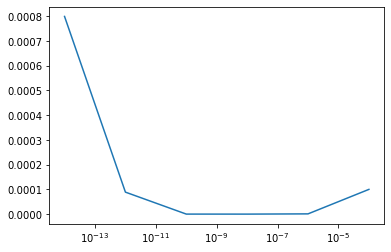

In [118]:
import matplotlib.pyplot as plt

def fun(x):
    delta = [10**(-14), 10**(-12), 10**(-10), 10**(-8), 10**(-6), 10**(-4)]
    der = []
    acc = []
    fx = x*(x-1)
    
    for d in delta:
        fxdelta = (x+d)*(x+d-1)
        dfdx = (fxdelta-fx)/d
        der.append(dfdx)
        print(dfdx)
    for i in der:
        if i>1:
            acc.append(i-1)
        else:
            acc.append(1-i)
    print(acc)

    plt.plot(delta, acc)
    plt.xscale('log')

    return

fun(1)

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [10]:
import math

def integral(N):
    h = 2/N
    Imezzi = 0
    I = 0
    
    for i in range (1, N//2+1):
        Imezzi += h*(math.sqrt(1-((i/(N/2))**2)))
        
    I = Imezzi*2
    
    print("Il valore calcolato dell'integrale è:", I)
    print("La differenza tra il valore vero e quello calcolato è:", math.pi/2-I)
    return I

#%timeit integral(7600000)
#%timeit integral(400000000)

s = integral(7600000)
m = integral(400000000)

d1 = (s - math.pi/2)
d2 = (m - math.pi/2)
print("The gain is: {}".format(d1-d2))

Il valore calcolato dell'integrale è: 1.5707960635576623
La differenza tra il valore vero e quello calcolato è: 2.6323723423260503e-07
Il valore calcolato dell'integrale è: 1.5707963217949579
La differenza tra il valore vero e quello calcolato è: 4.999938685301686e-09
The gain is: -2.5823729554730335e-07
